In [10]:
import Input_template
from Input_template import *

In [ ]:
## boundary files
district_boundary = "workdir/extra_inputs/shp_district/shp_district.shp"
village = "workdir/extra_inputs/shp_settlement/shp_settlement.shp"
taluk = "workdir/extra_inputs/shp_taluk/shp_taluk.shp"

In [12]:
solar_high = "workdir/solar/shp_solar_high/shp_solar_high.shp"
water_high = "workdir/water/shp_water_high/shp_water_high.shp"
forest_high = "workdir/forest/shp_forest_high/shp_forest_high.shp"
agri_high = "workdir/agri/shp_agri_high/shp_agri_high.shp"
indus_high = "workdir/industry/shp_industry_high/shp_industry_high.shp"
housing_high = "workdir/housing/shp_housing_high/shp_housing_high.shp"

In [ ]:
## boundary files
shp_district = read_df_UT(district_boundary)
shp_village = read_df_UT(village)
shp_taluk = read_df_UT(taluk)

In [13]:
shp_solar_high =read_df_UT(solar_high)
shp_water_high = read_df_UT(water_high)
shp_forest_high = read_df_UT(forest_high)
shp_agri_high = read_df_UT(agri_high)
shp_indus_high = read_df_UT(indus_high)
shp_housing_high =read_df_UT(housing_high)

In [ ]:
##reserve forest
shp_reserve_forest = read_df_UT("workdir/extra_inputs/shp_RF/shp_RF.shp")
##watershedboundary
shp_waterbasins = read_df_UT("workdir/water/waterdemandstats_basin.shp")
shp_waterbasins = gpd.overlay(shp_waterbasins,shp_district,how ="intersection")
shp_waterbasins.reset_index(drop =True,inplace=True)
# shp_waterbasins.to_file(get_in_workdir("water/shp_watershedbasins"))
## soil erosion
shp_soil_erosion = read_df_UT("workdir/agri/soil_erosion/soil_erosion.shp")
## solar settelement for pop density
shp_settlement = read_df_UT("output/solar/settlement/settlement.shp")

# solar

In [14]:
shp_solar_water= find_overlap(shp_solar_high,"water",shp_water_high)
shp_solar_forest = find_overlap(shp_solar_high,"forest",shp_forest_high)
shp_solar_agri =find_overlap(shp_solar_high,"agri",shp_agri_high)
shp_solar_housing =find_overlap(shp_solar_high,"hsing",shp_housing_high)
shp_solar_industry =find_overlap(shp_solar_high,"indus",shp_indus_high)

In [15]:
combined = pd.concat([shp_indus_high,shp_agri_high,shp_water_high,shp_forest_high,shp_housing_high])
combined.reset_index(inplace =True,drop =True)
inter = gpd.overlay(shp_solar_high,combined,how ="intersection",keep_geom_type=True)
inter = inter.dissolve()
inter = add_area_and_class(inter)

In [16]:
other = pd.concat([shp_indus_high,shp_agri_high,shp_water_high,shp_forest_high,shp_housing_high])
other.reset_index(inplace =True,drop =True)
intersec = gpd.overlay(shp_solar_high,other,how ="intersection",keep_geom_type=True)
intersec = add_area_and_class(intersec)

In [8]:
solar_cu = gpd.overlay(shp_solar_high,intersec,how ="difference",keep_geom_type=True)

AttributeError: 'NoneType' object has no attribute 'crs'

In [ ]:
solar_cu = solar_cu.explode()
solar_cu = solar_cu.reset_index()
solar_cu =add_area_and_class(solar_cu)

In [ ]:
solar_cu.area_acres.sum()

In [ ]:
solar_cu = solar_cu[solar_cu["area_acres"] > 1]

In [ ]:
solar_cu.area_acres.sum()

In [ ]:
solar_cu.reset_index(inplace =True,drop =True)

In [32]:
solar_cu.to_file(get_in_output("solar/solar_cu"))

In [33]:
data = {
    'solar_forest': shp_solar_forest.oparforest.sum(),
    'solar_water': shp_solar_water.oparwater.sum(),
    'solar-agri':shp_solar_agri.oparagri.sum(),
    'solar-housing': shp_solar_housing.oparhsing.sum(),
    'solar-indutry': shp_solar_industry.oparindus.sum(),
    'Competing use':inter.area_acres.sum(),
}
competing_use = pd.DataFrame(data, index=[0])

In [34]:
competing_use

,solar_forest,solar_water,solar-agri,solar-housing,solar-indutry,Competing use
0,1269.290553,0,7131.528242,193.819731,1133.125958,7428.471232



# Forest

In [35]:
shp_forest_water= find_overlap(shp_forest_high,"water",shp_water_high)
shp_forest_solar = find_overlap(shp_forest_high,"solar",shp_solar_high)
shp_forest_agri =find_overlap(shp_forest_high,"agri",shp_agri_high)
shp_forest_housing =find_overlap(shp_forest_high,"hsing",shp_housing_high)
shp_forest_industry =find_overlap(shp_forest_high,"indus",shp_indus_high)

combined = pd.concat([shp_indus_high,shp_agri_high,shp_water_high,shp_solar_high,shp_housing_high])
combined.reset_index(inplace =True,drop =True)
inter = gpd.overlay(shp_forest_high,combined,how ="intersection",keep_geom_type=True)
inter = inter.dissolve()
inter = add_area_and_class(inter)

data = {
    'forest_solar': shp_forest_solar.oparsolar.sum(),
    'forest_water': shp_forest_water.oparwater.sum(),
    'forest-agri':shp_forest_agri.oparagri.sum(),
    'forest-housing': shp_forest_housing.oparhsing.sum(),
    'forest-industry': shp_forest_industry.oparindus.sum(),
    'Competing use':inter.area_acres.sum(),
}
competing_use = pd.DataFrame(data, index=[0])

In [36]:
competing_use

,forest_solar,forest_water,forest-agri,forest-housing,forest-industry,Competing use
0,1269.290553,0,2316.574249,17.891052,226.116016,2624.942808


In [37]:
1269.290553 +2316.574249 +17.095894 +2517.303139

6120.263835

In [38]:
other = pd.concat([shp_indus_high,shp_agri_high,shp_water_high,shp_solar_high,shp_housing_high])
other.reset_index(inplace =True,drop =True)
intersec = gpd.overlay(shp_forest_high,other,how ="intersection",keep_geom_type=True)
intersec = add_area_and_class(intersec)

In [39]:
intersec.area_acres.sum()

3829.949362120099

In [40]:
forest_cu = gpd.overlay(shp_forest_high,intersec,how ="difference",keep_geom_type=True)
forest_cu = forest_cu.explode()
forest_cu.reset_index(inplace =True,drop =True)
forest_cu =add_area_and_class(forest_cu)
print("old :",forest_cu.area_acres.sum())
forest_cu = forest_cu[forest_cu["area_acres"] > 0.1]
print("new :",forest_cu.area_acres.sum())

C:\Users\User\AppData\Local\Temp\ipykernel_13268\3222001154.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  forest_cu = forest_cu.explode()


old : 8773.870560198717
new : 8772.144983842503


In [41]:
forest_cu.reset_index(inplace =True,drop =True)

In [42]:
forest_cu.to_file(get_in_output("forest/forest_cu"))

In [43]:
competing_use

,forest_solar,forest_water,forest-agri,forest-housing,forest-industry,Competing use
0,1269.290553,0,2316.574249,17.891052,226.116016,2624.942808


# Agri

In [44]:
shp_agri_water= find_overlap(shp_agri_high,"water",shp_water_high)
shp_agri_solar = find_overlap(shp_agri_high,"solar",shp_solar_high)
shp_agri_forest =find_overlap(shp_agri_high,"forest",shp_forest_high)
shp_agri_housing =find_overlap(shp_agri_high,"hsing",shp_housing_high)
shp_agri_industry =find_overlap(shp_agri_high,"indus",shp_indus_high)

combined = pd.concat([shp_indus_high,shp_forest_high,shp_water_high,shp_solar_high,shp_housing_high])
combined.reset_index(inplace =True,drop =True)
inter = gpd.overlay(shp_agri_high,combined,how ="intersection",keep_geom_type=True)
inter = inter.dissolve()
inter = add_area_and_class(inter)

data = {
    'agri_solar': shp_agri_solar.oparsolar.sum(),
    'agri_water': shp_agri_water.oparwater.sum(),
    'agri-forest':shp_agri_forest.oparforest.sum(),
    'agri-housing': shp_agri_housing.oparhsing.sum(),
    'agri-industry': shp_agri_industry.oparindus.sum(),
    'Competing use':inter.area_acres.sum(),
}
competing_use = pd.DataFrame(data, index=[0])

In [45]:
other = pd.concat([shp_indus_high,shp_forest_high,shp_water_high,shp_solar_high,shp_housing_high])
other.reset_index(inplace =True,drop =True)
intersec = gpd.overlay(shp_agri_high,other,how ="intersection",keep_geom_type=True)

intersec = add_area_and_class(intersec)

In [46]:
intersec.area_acres.sum()

12747.304910103316

In [47]:
agri_cu = gpd.overlay(shp_agri_high,intersec,how ="difference",keep_geom_type=True)
agri_cu = agri_cu.explode()
agri_cu.reset_index(inplace =True,drop =True)
agri_cu =add_area_and_class(agri_cu)
print("old :",agri_cu.area_acres.sum())
agri_cu = agri_cu[agri_cu["area_acres"] > 0.1]
print("new :",agri_cu.area_acres.sum())

C:\Users\User\AppData\Local\Temp\ipykernel_13268\4168103730.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  agri_cu = agri_cu.explode()


old : 34843.91659243351
new : 34764.275840036105


In [48]:
agri_cu.reset_index(inplace =True,drop =True)

In [49]:
agri_cu.to_file(get_in_output("agri/agri_cu"))

In [50]:
competing_use

,agri_solar,agri_water,agri-forest,agri-housing,agri-industry,Competing use
0,7131.528242,73.154524,2316.574249,628.870482,2596.919498,10358.258326


# Industry

In [51]:
shp_indus_water= find_overlap(shp_indus_high,"water",shp_water_high)
shp_indus_solar = find_overlap(shp_indus_high,"solar",shp_solar_high)
shp_indus_forest =find_overlap(shp_indus_high,"forest",shp_forest_high)
shp_indus_housing =find_overlap(shp_indus_high,"hsing",shp_housing_high)
shp_indus_agri =find_overlap(shp_indus_high,"agri",shp_agri_high)

combined = pd.concat([shp_agri_high,shp_forest_high,shp_water_high,shp_solar_high,shp_housing_high])
combined.reset_index(inplace =True,drop =True)
inter = gpd.overlay(shp_indus_high,combined,how ="intersection",keep_geom_type=True)
inter = inter.dissolve()
inter = add_area_and_class(inter)

data = {
    'indus_solar': shp_indus_solar.oparsolar.sum(),
    'indus_water': shp_indus_water.oparwater.sum(),
    'indus-forest':shp_indus_forest.oparforest.sum(),
    'indus-housing': shp_indus_housing.oparhsing.sum(),
    'indus-agri': shp_indus_agri.oparagri.sum(),
    'Competing use':inter.area_acres.sum(),
}
competing_use = pd.DataFrame(data, index=[0])

In [52]:
other = pd.concat([shp_agri_high,shp_forest_high,shp_water_high,shp_solar_high,shp_housing_high])
other.reset_index(inplace =True,drop =True)
intersec = gpd.overlay(shp_indus_high,other,how ="intersection",keep_geom_type=True)
intersec = add_area_and_class(intersec)

In [53]:
intersec.area_acres.sum()

4181.9715090001455

In [54]:
indus_cu = gpd.overlay(shp_indus_high,intersec,how ="difference",keep_geom_type=True)
indus_cu = indus_cu.explode()
indus_cu.reset_index(inplace =True,drop =True)
indus_cu =add_area_and_class(indus_cu)
print("old :",indus_cu.area_acres.sum())
indus_cu = indus_cu[indus_cu["area_acres"] > 0.1]
print("new :",indus_cu.area_acres.sum())

C:\Users\User\AppData\Local\Temp\ipykernel_13268\1985948178.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  indus_cu = indus_cu.explode()


old : 4858.513779246801
new : 4856.959761631555


In [55]:
indus_cu.reset_index(inplace =True,drop =True)

In [56]:
indus_cu.to_file(get_in_output("industry/indus_cu"))

In [57]:
competing_use

,indus_solar,indus_water,indus-forest,indus-housing,indus-agri,Competing use
0,1133.125958,30.514183,226.116016,195.211258,2596.919498,2837.803331


# Housing

In [58]:
shp_housing_water= find_overlap(shp_housing_high,"water",shp_water_high)
shp_housing_solar = find_overlap(shp_housing_high,"solar",shp_solar_high)
shp_housing_forest =find_overlap(shp_housing_high,"forest",shp_forest_high)
shp_housing_indus =find_overlap(shp_housing_high,"indus",shp_indus_high)
shp_housing_agri =find_overlap(shp_housing_high,"agri",shp_agri_high)

combined = pd.concat([shp_agri_high,shp_forest_high,shp_water_high,shp_solar_high,shp_indus_high])
combined.reset_index(inplace =True,drop =True)
inter = gpd.overlay(shp_housing_high,combined,how ="intersection",keep_geom_type=True)
inter = inter.dissolve()
inter = add_area_and_class(inter)

data = {
    'housing_solar': shp_housing_solar.oparsolar.sum(),
    'housing_water': shp_housing_water.oparwater.sum(),
    'housing-forest':shp_housing_forest.oparforest.sum(),
    'housing-indus': shp_housing_indus.oparindus.sum(),
    'housing-agri': shp_housing_agri.oparagri.sum(),
    'Competing use':inter.area_acres.sum(),
}
competing_use = pd.DataFrame(data, index=[0])

In [59]:
other = pd.concat([shp_agri_high,shp_forest_high,shp_water_high,shp_solar_high,shp_indus_high])
other.reset_index(inplace =True,drop =True)
intersec = gpd.overlay(shp_housing_high,other,how ="intersection",keep_geom_type=True)
intersec = add_area_and_class(intersec)

In [60]:
intersec.area_acres.sum()

1035.8134856963088

In [61]:

housing_cu = gpd.overlay(shp_housing_high,intersec,how ="difference",keep_geom_type=True)
housing_cu = housing_cu.explode()
housing_cu.reset_index(inplace =True,drop =True)
housing_cu =add_area_and_class(housing_cu)
print("old :",housing_cu.area_acres.sum())
housing_cu = housing_cu[housing_cu["area_acres"] > 0.1]
print("new :",housing_cu.area_acres.sum())

old : 1328.8350901254394
new : 1326.7477553755418


C:\Users\User\AppData\Local\Temp\ipykernel_13268\645447803.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  housing_cu = housing_cu.explode()


In [62]:
housing_cu.reset_index(inplace =True,drop =True)

In [63]:
housing_cu.to_file(get_in_output("housing/housing_cu"))

In [64]:
competing_use

,housing_solar,housing_water,housing-forest,housing-indus,housing-agri,Competing use
0,193.819731,0,17.891052,195.211258,628.870482,820.321337


# Water

In [65]:
shp_water_housing= find_overlap(shp_water_high,"hsing",shp_housing_high)
shp_water_solar = find_overlap(shp_water_high,"solar",shp_solar_high)
shp_water_forest =find_overlap(shp_water_high,"forest",shp_forest_high)
shp_water_indus =find_overlap(shp_water_high,"indus",shp_indus_high)
shp_water_agri =find_overlap(shp_water_high,"agri",shp_agri_high)

combined = pd.concat([shp_agri_high,shp_forest_high,shp_housing_high,shp_solar_high,shp_indus_high])
combined.reset_index(inplace =True,drop =True)
inter = gpd.overlay(shp_water_high,combined,how ="intersection",keep_geom_type=True)
inter = inter.dissolve()
inter = add_area_and_class(inter)

data = {
    'water_solar': shp_water_solar.oparsolar.sum(),
    'water_housing': shp_water_housing.oparhsing.sum(),
    'water-forest':shp_water_forest.oparforest.sum(),
    'water-indus': shp_water_indus.oparindus.sum(),
    'water-agri': shp_water_agri.oparagri.sum(),
    'Competing use':inter.area_acres.sum(),
}
competing_use = pd.DataFrame(data, index=[0])

In [66]:
other = pd.concat([shp_agri_high,shp_forest_high,shp_housing_high,shp_solar_high,shp_indus_high])
other.reset_index(inplace =True,drop =True)
intersec = gpd.overlay(shp_water_high,other,how ="intersection",keep_geom_type=True)
intersec = add_area_and_class(intersec)

In [67]:
intersec.area_acres.sum()

103.67080457502307

In [68]:
water_cu = gpd.overlay(shp_water_high,intersec,how ="difference",keep_geom_type=True)
water_cu = water_cu.explode()
water_cu.reset_index(inplace =True,drop =True)
water_cu =add_area_and_class(water_cu)
print("old :",water_cu.area_acres.sum())
water_cu = water_cu[water_cu["area_acres"] > 0.09]
print("new :",water_cu.area_acres.sum())

old : 85.48120176710034
new : 85.48120092623317


C:\Users\User\AppData\Local\Temp\ipykernel_13268\3033911551.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  water_cu = water_cu.explode()


In [69]:
water_cu.reset_index(inplace =True,drop =True)

In [70]:
water_cu.to_file(get_in_output("water/water_cu"))

In [71]:
competing_use

,water_solar,water_housing,water-forest,water-indus,water-agri,Competing use
0,0,0,0,30.514183,73.154524,103.670805


# no competing use

In [72]:
agri_cu = agri_cu[["area_acres","geometry"]]
solar_cu = solar_cu[["area_acres","geometry"]]
forest_cu = forest_cu[["area_acres","geometry"]]
water_cu = water_cu[["area_acres","geometry"]]
indus_cu = indus_cu[["area_acres","geometry"]]
housing_cu = housing_cu[["area_acres","geometry"]]

In [73]:
# No_competinguse = pd.concat([solar_cu,forest_cu,agri_cu,water_cu,housing_cu,indus_cu])
# No_competinguse.reset_index(inplace =True,drop =True)

In [74]:
# No_competinguse

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

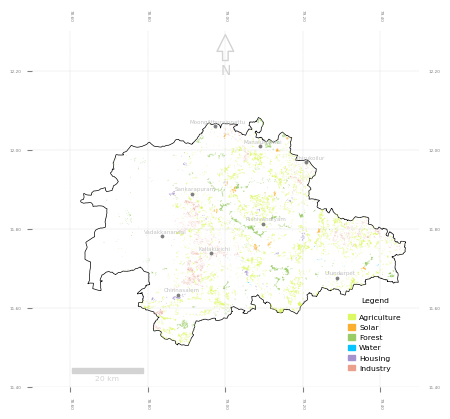

In [89]:
fig7, ax7 = plt.subplots(figsize=(5, 5))

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


_plt_district = shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)


agri_cu.plot(color="#ddf865",ax =ax7, label ='Agriculture')
solar_cu.plot(color="#fbaf30",ax =ax7, label = 'Solar')
forest_cu.plot(color="#99cc66",ax =ax7, label = 'Forest')
water_cu.plot(color="#07c4ff",ax =ax7, label = 'Water')
housing_cu.plot(color="#a692ce",ax =ax7, label = 'Housing')
indus_cu.plot(color="#eb9f8d",ax =ax7, label = 'Industry')

agri = mpatches.Patch(color="#ddf865", label ='Agriculture')
solar = mpatches.Patch(color="#fbaf30", label = 'Solar')
forest = mpatches.Patch(color="#99cc66", label = 'Forest')
water = mpatches.Patch(color="#07c4ff", label = 'Water')
housing = mpatches.Patch(color="#a692ce", label = 'Housing')
indus = mpatches.Patch(color="#eb9f8d", label = 'Industry')

    
plt.legend(handles = [agri, solar, forest, water, housing, indus], loc = 'upper left', bbox_to_anchor=(0.8, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


plt.savefig(get_in_output("images/Nocompetinguse.jpg"),dpi =1500,transparent=True)
plt.show()

In [21]:
shp_agri_solar = pd.concat([shp_solar_high,shp_agri_high],ignore_index =True)

In [28]:
shp_agri_solar.to_file(get_in_output("competing_use/shp_agri_solar"))

In [22]:
shp_indus_housing = pd.concat([shp_indus_high,shp_housing_high],ignore_index =True)

In [29]:
shp_indus_housing.to_file(get_in_output("competing_use/shp_indus_housing"))

In [23]:
shp_forest_water = pd.concat([shp_forest_high,shp_water_high],ignore_index =True)

In [30]:
shp_forest_water.to_file(get_in_output("competing_use/shp_forest_water"))

In [24]:
shp_inter_fw_sa = gpd.overlay(shp_agri_solar,shp_forest_water,how ="intersection",keep_geom_type=True)

In [25]:
shp_inter_sa_ih = gpd.overlay(shp_indus_housing,shp_agri_solar,how ="intersection",keep_geom_type=True)

In [26]:
shp_inter_fw_ih = gpd.overlay(shp_indus_housing,shp_forest_water,how ="intersection",keep_geom_type=True)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

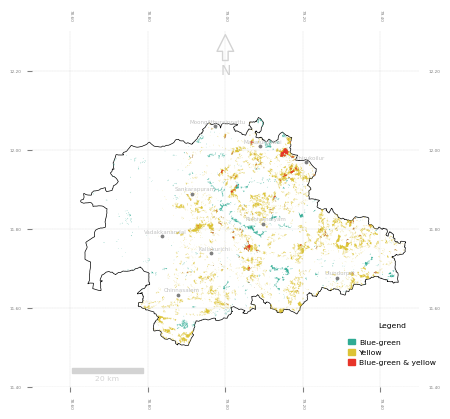

In [86]:
fig7, ax7 = plt.subplots(figsize=(5, 5))

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


_plt_district = shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)


shp_forest_water.plot(color="#2fab94",ax =ax7, label ='Blue-green')
shp_agri_solar.plot(color="#dcc336",ax =ax7, label = 'Yellow')
shp_inter_fw_sa.plot(color="#e73429",ax =ax7, label = 'Blue-green & yellow')

forest_water = mpatches.Patch(color="#2fab94", label ='Blue-green')
agri_solar = mpatches.Patch(color="#dcc336", label = 'Yellow')
inter_fw_sa = mpatches.Patch(color="#e73429", label = 'Blue-green & yellow')

    
plt.legend(handles = [forest_water, agri_solar,inter_fw_sa], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


plt.savefig(get_in_output("images/FW_with_SA.jpg"),dpi =1500,transparent=True)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

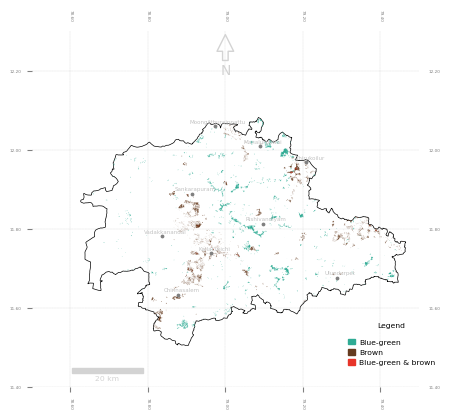

In [87]:
fig7, ax7 = plt.subplots(figsize=(5, 5))

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


_plt_district = shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)


shp_forest_water.plot(color="#2fab94",ax =ax7, label ='Blue-green')
shp_indus_housing.plot(color="#653b1f",ax =ax7, label = 'Brown')
shp_inter_fw_ih.plot(color="#e73429",ax =ax7, label = 'Blue-green & brown')

forest_water = mpatches.Patch(color="#2fab94", label ='Blue-green')
indus_housing = mpatches.Patch(color="#653b1f", label = 'Brown')
inter_fw_ih = mpatches.Patch(color="#e73429", label = 'Blue-green & brown')

    
plt.legend(handles = [forest_water, indus_housing,inter_fw_ih], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


plt.savefig(get_in_output("images/FW_with_IH.jpg"),dpi =1500,transparent=True)
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

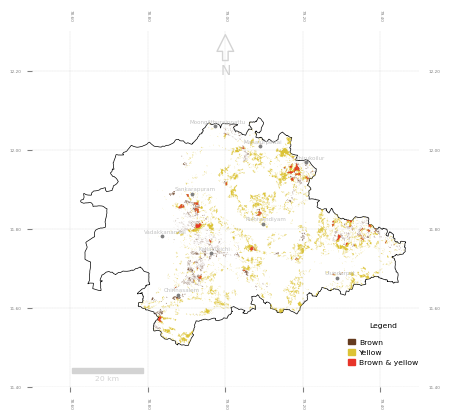

In [88]:
fig7, ax7 = plt.subplots(figsize=(5, 5))

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


_plt_district = shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)


shp_indus_housing.plot(color="#653b1f",ax =ax7, label ='Brown')
shp_agri_solar.plot(color="#dcc336",ax =ax7, label = 'Yellow')
shp_inter_sa_ih.plot(color="#e73429",ax =ax7, label = 'Brown & yellow')

indus_housing = mpatches.Patch(color="#653b1f", label ='Brown')
agri_solar = mpatches.Patch(color="#dcc336", label = 'Yellow')
inter_sa_ih = mpatches.Patch(color="#e73429", label = 'Brown & yellow')

    
plt.legend(handles = [indus_housing, agri_solar,inter_sa_ih], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


plt.savefig(get_in_output("images/IH_with_SA.jpg"),dpi =1500,transparent=True)
plt.show()

# Extra features

## Reserve forest

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

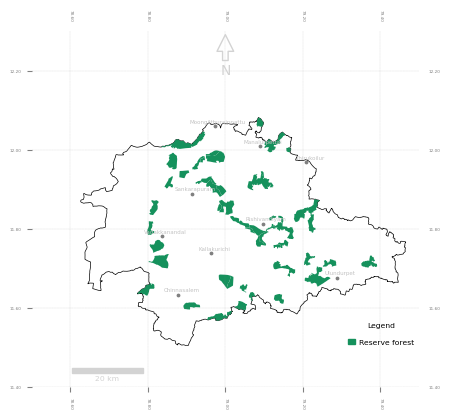

In [63]:
fig7, ax7 = plt.subplots(figsize=(5, 5))

plot_common_features(fig7, ax7)
plot_cities(fig7, ax7)


_plt_district = shp_district.plot(ax=ax7, figsize =(5,5),color="none",linewidth = 0.5)


shp_reserve_forest.plot(color="#15915c",ax =ax7, label ='Reserve forest')


reserve_forest = mpatches.Patch(color="#15915c", label ='Reserve forest')


    
plt.legend(handles = [reserve_forest], loc = 'upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)


plt.savefig(get_in_output("images/Features/RF.jpg"),dpi =1500,transparent=True)
plt.show()

## Soil erosion

In [11]:
# Create a new column that maps categories to specific colors
shp_soil_erosion['color'] = np.where(shp_soil_erosion['erosion_ca'] == 'slightly', '#fff4aa',
                       np.where(shp_soil_erosion['erosion_ca'] == 'moderately', '#ffd65a',
                                np.where(shp_soil_erosion['erosion_ca'] == 'severely', '#cb8b54', 'white')))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

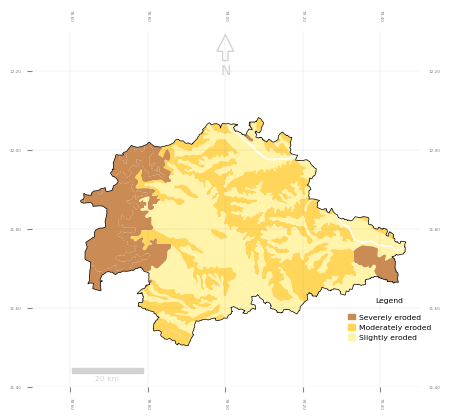

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_common_features(fig, ax) 

shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=5)
shp_soil_erosion.plot(color=shp_soil_erosion['color'], ax=ax)
Severely = mpatches.Patch(color="#cb8b54", label = 'Severely eroded')
Moderately = mpatches.Patch(color="#ffd65a", label = 'Moderately eroded')
Slightly= mpatches.Patch(color="#fff4aa", label = 'Slightly eroded')
plt.legend(handles = [Severely, Moderately, Slightly], loc = 'upper left', bbox_to_anchor=(0.8, 0.27), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)
plt.savefig(get_in_output("images/Features/soil_erosion.jpg"),dpi =1500)
plt.show()

## Population raster

In [15]:
pop = LinearSegmentedColormap.from_list('testCmap', 
                                               colors=['#E9FF70', '#F6DE26', '#FF8811', '#F71A16', '#C4171C', '#A70B0B'], N=256)

In [16]:
population_raster = "D:\\Lila_Kallakuruchi\\workdir\\raster\\population_10_lon_70_general-v1.5_cut.tif"

In [17]:
pop_raster_read = rasterio.open(population_raster)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

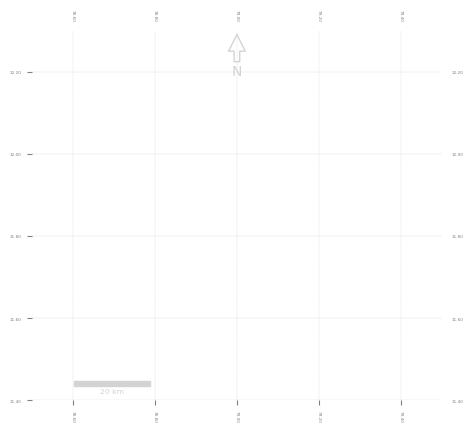

In [18]:
with rasterio.open(population_raster) as src:
    data = src.read(1)


# Create a masked array to ignore nodata values
data_masked = np.ma.masked_where(data <= 0, data)

# Plot the raster data with colors based on the categories
fig, ax = plt.subplots()
plot_common_features(fig, ax)
# im = ax.imshow(data_masked, cmap=cmap)
image = rasterio.plot.show(data_masked,transform=pop_raster_read.transform,
                      ax=ax,
                      cmap=pop, 
                      )

# # Show the plot
plt.savefig(get_in_output("images/Features/population_density.jpg"),dpi =1500)
plt.show()

In [21]:
shp_settlement["Pop_den"] = shp_settlement["totpop"]/shp_settlement["TGA(acres)"]

In [22]:
pop = LinearSegmentedColormap.from_list('testCmap', 
                                               colors=['#f8ede7', '#dacec8', '#a69c9a', '#605d66', '#2f2f2f'], N=256)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

0.0 16.093634000506253


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

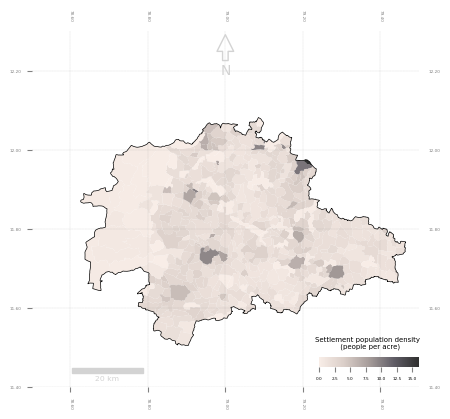

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_common_features(fig, ax)  # assuming this function is defined elsewhere

shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=5)
shp_settlement.plot(column='Pop_den', cmap=pop, ax=ax)
a = shp_settlement["Pop_den"].min()
b = shp_settlement["Pop_den"].max()
sm = plt.cm.ScalarMappable(cmap=pop)
cbaxes = fig.add_axes([0.7, 0.18, 0.2, 0.02]) 
cbar = plt.colorbar(sm, orientation = 'horizontal', cax=cbaxes, shrink = 0.2)
cbar.mappable.set_clim(vmin = a, vmax = b)
cbar.ax.tick_params(labelsize=3, color = 'grey')
cbar.outline.set_visible(False)
cbar.ax.set_title('Settlement population density \n (people per acre)', fontsize=5)

print(a,b)

plt.savefig(get_in_output("images/Features/Pop_den_heatmap.jpg"),dpi =1500)
plt.show()

## Watershedbasin

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

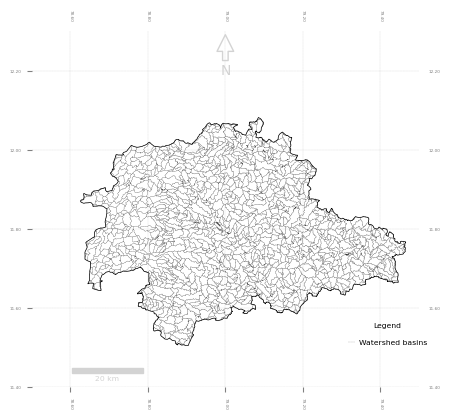

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_common_features(fig, ax)  # assuming this function is defined elsewhere
shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=2)
shp_waterbasins.boundary.plot(figsize=(5,5), color="black", ax=ax, linewidth=0.1, zorder=1,linestyle='--', label='Watershed basins')



ax.legend(loc='upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)

plt.savefig(get_in_output("images/Features/watershedbasins.jpg"),dpi =1500)
plt.show()

## Evapotranspiration

In [57]:
Et = LinearSegmentedColormap.from_list('testCmap', 
                                               colors=['#fbfff7', '#b8f3e1', '#78e7ca', '#299f86', '#0f5a56'], N=256)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

0.0 91.43


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

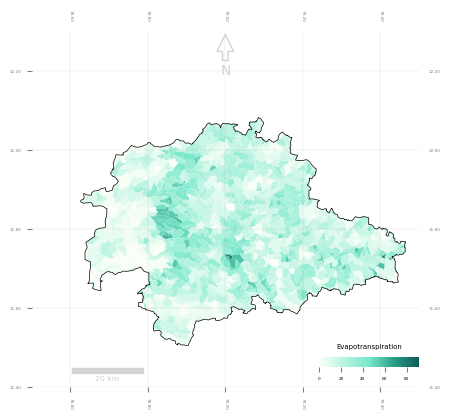

In [58]:

fig, ax = plt.subplots(figsize=(5, 5))

plot_common_features(fig, ax)  # assuming this function is defined elsewhere

shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=5)
shp_waterbasins.plot(column='HiETAr%', cmap=Et, ax=ax)
a = shp_waterbasins["HiETAr%"].min()
b = shp_waterbasins["HiETAr%"].max()
sm = plt.cm.ScalarMappable(cmap=Et)
cbaxes = fig.add_axes([0.7, 0.18, 0.2, 0.02]) 
cbar = plt.colorbar(sm, orientation = 'horizontal', cax=cbaxes, shrink = 0.2)
cbar.mappable.set_clim(vmin = a, vmax = b)
cbar.ax.tick_params(labelsize=3, color = 'grey')
cbar.outline.set_visible(False)
cbar.ax.set_title('Evapotranspiration', fontsize=5)

print(a,b)

plt.savefig(get_in_output("images/Features/Evapotranspiration.jpg"),dpi =1500)
plt.show()

## Taluk Image

In [107]:
shp_taluk['coords'] = shp_taluk['geometry'].apply(lambda x: x.representative_point().coords[:])
shp_taluk['coords'] = [coords[0] for coords in shp_taluk['coords']]
shp_taluk["coords"].tolist()
shp_taluk[['lat', 'lon']] = gpd.GeoDataFrame(shp_taluk['coords'].tolist(), index=shp_taluk.index) 

In [108]:
shp_taluk['Taluk_name']

0         Tirukkoilur
1        Sankarapuram
2          Ulundurpet
3        Chinna selam
4      Kallakurichchi
5    Kalvarayan Hills
Name: Taluk_name, dtype: object

In [109]:
# replace a value in the 'Name' column
shp_taluk['Taluk_name'].replace({'Tirukkoilur': 'Tirukkovilur','Chinna selam':'Chinna Salem'}, inplace=True)

# convert the 'Salary' column from float to integer
shp_taluk['area_acres'] = shp_taluk['area_acres'].astype(int)

In [110]:
shp_taluk["sq_km2"] = shp_taluk['area_acres']/247.105
shp_taluk['sq_km2'] = shp_taluk['sq_km2'].astype(int)

In [111]:
matplotlib.rcParams['text.usetex'] = False 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

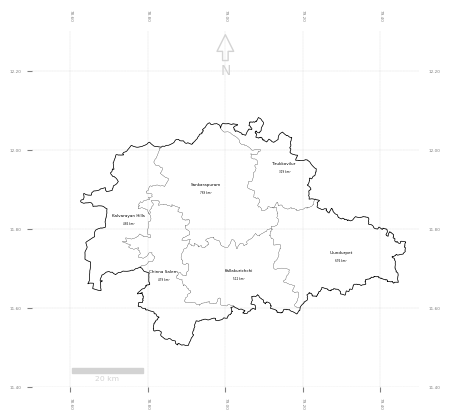

In [114]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_common_features(fig, ax)  # assuming this function is defined elsewhere
# plot_cities(fig, ax)

x = shp_taluk["lat"]
y = shp_taluk["lon"]    
labels =shp_taluk["Taluk_name"]
area = shp_taluk["sq_km2"]

for i in range(0,len(shp_taluk)):
    plt.text(x[i],y[i],labels[i],fontsize=3,color = 'black', ha = 'center',zorder=10)
    plt.text(x[i],y[i]-0.02,f'{area[i]} km\u00b2',fontsize=2,color = 'black', ha = 'center',zorder=11)

shp_district.plot(figsize=(5,5), color="none", ax=ax, linewidth=0.5, zorder=2)
shp_taluk.boundary.plot(figsize=(5,5), color="black", ax=ax, linewidth=0.1, zorder=1, label='Taluk')



# ax.legend(loc='upper left', bbox_to_anchor=(0.8, 0.2), title = 'Legend\n', fontsize = 5.5, markerscale = 2, title_fontsize = 5.5, framealpha= 0, borderpad = 0.3, handletextpad = 0.5, handlelength = 1.0)

plt.savefig(get_in_output("images/Features/taluk.jpg"),dpi =1500)
plt.show()